In [2]:
from pathlib import Path
import os
import sys
import pandas as pd
from unidecode import unidecode
import unicodedata
import numpy as np
import math as m
import re
import matplotlib.pyplot as plt


In [3]:
ruta = "Resultados/Data_SEN_target.xlsx"

Data = pd.read_excel(ruta)
Data

,Name1,Name2,Name3,Nombre PowerFactory,Type,EMTP Status,EMTP Load Flow Component,Página PowerFactory,Tensión en Bornes [kV],P despachada [MW],Q despachada [Mvar],Tipo de Barra Flujo de Carga,Sbase [MVA],P_set [MW],Q_set [Mvar],V_set [kV],Tensión Nominal [kV],Potencia Nominal [MVA],Nº_unid_serv,Nº_unid
0,PFV_Capricornio,PFV_Capricornio_new,NaN,PFV CAPRICORNIO,Parque Fotovoltaico,1,NaN,00-Norte Grande,105.74,60.01,-21.67,NaN,95.0190,95.019000,-21.673834,NaN,110.000,95.0190,57,57
1,PFV_Quilapilun,PFV_Quilapilun,NaN,PFV QUILAPILUN,Parque Fotovoltaico,1,NaN,03-Chilquinta-Aconcagua,227.17,99.22,-1.50,NaN,110.0220,99.219840,-1.500300,NaN,220.000,110.0220,66,66
2,PFV_Dona_Carmen,PFV_Dona_Carmen,NaN,PFV DOÑA CARMEN SOLAR,Parque Fotovoltaico,1,NaN,02-Coquimbo,226.04,27.94,0.00,NaN,35.0070,27.938920,0.000000,NaN,220.000,35.0070,21,21
3,PFV_EL_PELICANO,PFV_EL_PELICANO,NaN,NaN,Parque Fotovoltaico,1,NaN,02-Coquimbo,226.54,94.50,-16.10,NaN,110.0022,67.871357,-16.104322,NaN,220.000,110.0022,66,66
4,PFV_LA_HUELLA,PFV_LA_HUELLA,NaN,PFV LA HUELLA,Parque Fotovoltaico,1,NaN,02-Coquimbo,226.46,79.40,-24.07,NaN,94.3800,58.232460,-24.066900,NaN,220.000,94.3800,26,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,ILLAPA_GFM,NaN,NaN,NaN,Grid Forming,0,NaN,NaN,0.59,0.00,0.00,NaN,200.0000,NaN,NaN,NaN,0.575,200.0000,200,200
327,LIKANA_GFM,NaN,NaN,NaN,Grid Forming,0,NaN,NaN,0.60,0.00,0.00,NaN,200.0000,NaN,NaN,NaN,0.575,200.0000,200,200
328,NCHUQUI_GFM,NaN,NaN,NaN,Grid Forming,0,NaN,NaN,0.60,0.00,0.00,NaN,200.0000,NaN,NaN,NaN,0.575,200.0000,200,200
329,AMARIA_GFM,NaN,NaN,NaN,Grid Forming,0,NaN,NaN,0.60,0.00,0.00,NaN,200.0000,NaN,NaN,NaN,0.575,200.0000,200,200


In [36]:
Data_PV = Data[Data['Type'] == 'Parque Fotovoltaico']
Data_WP = Data[Data['Type'] == 'Parque Eólico']
Data_SG = Data[Data['Type'] == 'Generador Sincrónico']
Data_GFM = Data[Data['Type'] == 'Grid Forming']

SUMA_PV_P = Data_PV['P despachada [MW]'].sum()
SUMA_WP_P = Data_WP['P despachada [MW]'].sum()
SUMA_SG_P = Data_SG['P despachada [MW]'].sum()
SUMA_GFM_P = Data_GFM['P despachada [MW]'].sum()

Total = SUMA_PV_P + SUMA_WP_P+ SUMA_SG_P+ SUMA_GFM_P
SUMA_GFL_P = SUMA_PV_P+SUMA_WP_P

pPV= 100*SUMA_PV_P/Total
pWP= 100*SUMA_WP_P/Total
pSG= 100*SUMA_SG_P/Total
pGFM= 100*SUMA_GFM_P/Total
pGFL= 100*SUMA_GFL_P/Total
Data_SG


,Name1,Name2,Name3,Nombre PowerFactory,Type,EMTP Status,EMTP Load Flow Component,Página PowerFactory,Tensión en Bornes [kV],P despachada [MW],...,Tipo de Barra Flujo de Carga,Sbase [MVA],P_set [MW],Q_set [Mvar],V_set [kV],Tensión Nominal [kV],Potencia Nominal [MVA],P despachada [pu],Nº_unid_serv,Nº_unid
100,Central_Colbun,Colbun_U1,Colbun_U1,HE COLBUN U1,Generador Sincrónico,1.0,LF_COLB_U1,05-Colbún,14.2,100.0,...,PV,NaN,100.0,480.0,14.2000,13.8,220.000,0.454545,NaN,NaN
101,Central_Colbun,Colbun_U2,Colbun_U2,HE COLBUN U2,Generador Sincrónico,1.0,LF_COLB_U2,05-Colbún,14.2,100.0,...,PV,NaN,100.0,23.8,14.2000,13.8,220.000,0.454545,NaN,NaN
102,Central_Canutillar,Canutillar_U1,Canutillar_U1,HE CANUTILLAR U1,Generador Sincrónico,1.0,LF_CANU_U1,10-Araucanía,14.2,25.0,...,PV,NaN,25.0,480.0,14.2000,13.8,70.000,0.357143,NaN,NaN
103,Central_Canutillar,Canutillar_U2,Canutillar_U2,HE CANUTILLAR U21,Generador Sincrónico,1.0,LF_CANU_U2,10-Araucanía,14.2,25.0,...,PV,NaN,25.0,480.0,14.2000,13.8,70.000,0.357143,NaN,NaN
104,Central_Pangue,Pangue_U1,Pangue_U1,HE PANGUE U1,Generador Sincrónico,1.0,LF_PANG_U1,08-Charrúa,13.5,73.9,...,PV,NaN,73.9,480.0,13.5000,13.8,240.000,0.307917,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,Central_Guacolda,Guacolda_U1,Guacolda_U1,TER GUACOLDA U1,Generador Sincrónico,0.0,LF_GUACOLDA_U1,01-Atacama,NaN,NaN,...,PV,NaN,50.0,480.0,13.8000,13.8,176.500,0.000000,NaN,NaN
240,Central_Guacolda,Guacolda_U2,Guacolda_U2,TER GUACOLDA U2,Generador Sincrónico,0.0,LF_GUACOLDA_U2,01-Atacama,NaN,NaN,...,PV,NaN,50.0,480.0,13.8000,13.8,176.500,0.000000,NaN,NaN
241,Central_Guacolda,Guacolda_U3,Guacolda_U3,TER GUACOLDA U3,Generador Sincrónico,0.0,LF_GUACOLDA_U3,01-Atacama,NaN,NaN,...,PV,NaN,45.0,480.0,13.3000,13.3,178.820,0.000000,NaN,NaN
242,Central_Guacolda,Guacolda_U4,Guacolda_U4,TER GUACOLDA U4,Generador Sincrónico,0.0,LF_GUACOLDA_U4,01-Atacama,NaN,NaN,...,PV,NaN,38.0,480.0,14.0485,14.5,178.820,0.000000,NaN,NaN


In [41]:
#nominal en servicio

Data_PV = Data[(Data['Type'] == 'Parque Fotovoltaico') & (Data['EMTP Status'] == 1)]
Data_WP = Data[(Data['Type'] == 'Parque Eólico') & (Data['EMTP Status'] == 1)]
Data_SG = Data[(Data['Type'] == 'Generador Sincrónico') & (Data['EMTP Status'] == 1)]
Data_GFM = Data[(Data['Type'] == 'Grid Forming') & (Data['EMTP Status'] == 1)]

SUMA_PV_nom = Data_PV['Sbase [MVA]'].sum()
SUMA_WP_nom = Data_WP['Sbase [MVA]'].sum()
SUMA_SG_nom = Data_SG['Potencia Nominal [MVA]'].sum()
SUMA_GFM_nom = Data_GFM['Sbase [MVA]'].sum()

Total_nom = SUMA_PV_nom + SUMA_WP_nom+ SUMA_SG_nom+ SUMA_GFM_nom
SUMA_GFL_nom = SUMA_PV_nom+SUMA_WP_nom
pPV_nom= 100*SUMA_PV_nom/Total_nom
pWP_nom= 100*SUMA_WP_nom/Total_nom
pSG_nom= 100*SUMA_SG_nom/Total_nom
pGFM_nom= 100*SUMA_GFM_nom/Total_nom
pGFL_nom= 100*SUMA_GFL_nom/Total_nom
print(SUMA_SG_nom,SUMA_WP_nom)

3857.8360000000002 3299.52


In [42]:
unidades = ["Synchronous Generation","GFL","GFM"]
Sumas =[SUMA_SG_P, SUMA_GFL_P,SUMA_GFM_P ]
Porcentaje = [pSG,pGFL,pGFM]
Suma_nom = [SUMA_SG_nom, SUMA_GFL_nom,SUMA_GFM_nom]
Porcentaje_nom = [pSG_nom,pGFL_nom,pGFM_nom]

data_resultados = {"Type of Generation": unidades, 
                    "Dispatched active power [MW]": Sumas,
                    "Dispatch participation [%]": Porcentaje,
                    "Nominal Capacity in service [MW]" :  Suma_nom,
                    "In-service capacity participation [%]" : Porcentaje_nom
}
data_resultados= pd.DataFrame(data_resultados)
data_resultados

,Type of Generation,Dispatched active power [MW],Dispatch participation [%],Nominal Capacity in service [MW],In-service capacity participation [%]
0,Synchronous Generation,1624.88,15.573576,3857.8360,24.360354
1,GFL,8408.69,80.592645,11178.6993,70.588036
2,GFM,400.00,3.833779,800.0000,5.051610


In [5]:
SG_Snom_serv=Data.loc[(Data['Type'] == "Generador Sincrónico")  & (Data["EMTP Status"] > 0) , 'Potencia Nominal [MVA]'].sum()
PV_Snom_serv=Data.loc[(Data['Type'] == "Parque Fotovoltaico")  & (Data["EMTP Status"] > 0) , 'Sbase [MVA]'].sum()
WP_Snom_serv=Data.loc[(Data['Type'] == "Parque Eólico")  & (Data["EMTP Status"] > 0) , 'Sbase [MVA]'].sum()
GFM_Snom_serv=Data.loc[(Data['Type'] == "Grid Forming")  & (Data["EMTP Status"] > 0) , 'Sbase [MVA]'].sum()
print(SG_Snom_serv,PV_Snom_serv,WP_Snom_serv,GFM_Snom_serv)

3857.8360000000002 7879.179299999999 3299.52 800.0


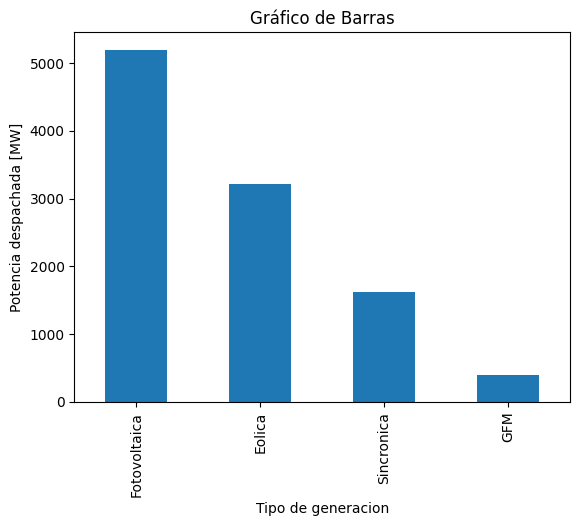

In [22]:
datos = {'Potencia despachada': [PFV_P, WP_P,SG_P, GFM_P]}

#datos = {'Potencia despachada': [pPV, pWP,pSG, pGFM]}
df = pd.DataFrame(datos, index=['Fotovoltaica', 'Eolica', 'Sincronica', 'GFM'])

# Crear un gráfico de barras
df.plot(kind='bar', legend=False)

# Añadir etiquetas y título
plt.xlabel('Tipo de generacion')
plt.ylabel('Potencia despachada [MW]')
plt.title('Gráfico de Barras')

# Mostrar el gráfico
plt.show()

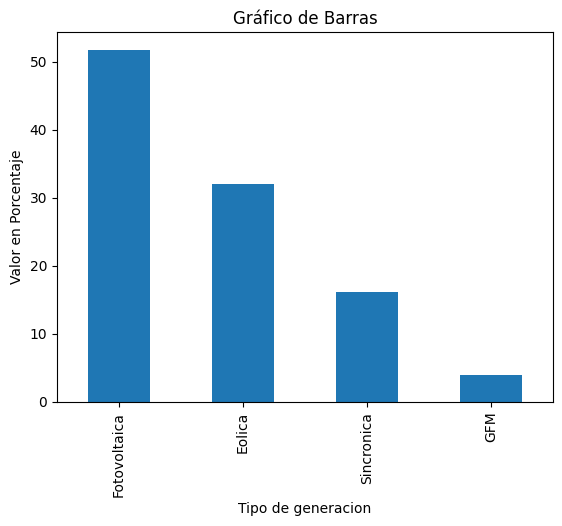

In [21]:
#datos = {'Potencia despachada': [PFV_P, WP_P,SG_P, GFM_P]}

datos = {'Potencia despachada': [pPV, pWP,pSG, pGFM]}
df = pd.DataFrame(datos, index=['Fotovoltaica', 'Eolica', 'Sincronica', 'GFM'])

# Crear un gráfico de barras
df.plot(kind='bar', legend=False)

# Añadir etiquetas y título
plt.xlabel('Tipo de generacion')
plt.ylabel('Valor en Porcentaje')
plt.title('Gráfico de Barras')

# Mostrar el gráfico
plt.show()